# Stats Tests

The purpose of this notebook is to look into statistical significance, hypothesis tests, and tests to verify that the empirical distributions match or don't match the theoretical distributions I see these variables as.

In this notebook I'll perform the following:

1. A little more EDA as needed and data cleaning that results from that

2. Joining the region IDs and filtering down as I've done for the master DF

3. Bootstrap resampling on various discrete and continuous variables to see that my samples reasonably came from the population.

4. Bayesian tests as necessary.

In [243]:
# some manipulations happened in EDA Part I so I'm loading in an updated dev_df.

import pandas as pd, numpy as np

dev_df = pd.read_csv('C:/Users/riley/Documents/Coding/DSC/lyft_no_data/dev_df_post_EDA_cleaning.csv')

In [244]:
# joining the regions df so that I can filter by SF region

regions = pd.read_csv('C:/Users/riley/Documents/Coding/DSC/lyft_no_data/region_ids.csv')

dev_df = pd.merge(dev_df, regions, 'inner', left_on='start_station_id', right_on='station_id')

In [245]:
# filter by SF region

dev_df = dev_df[dev_df['region_id'] == 3]

In [246]:
# Get revenue by station

station_revenue = dev_df.pivot_table(values='cost_to_ride', columns='start_station_id', aggfunc='sum').melt()

In [247]:
station_revenue['total_value_of_station'] = station_revenue['value']

In [248]:
station_revenue.drop('value', axis=1, inplace=True)

In [249]:
dev_df = dev_df.merge(station_revenue, 'inner', left_on='start_station_id', right_on='total_value_of_station')

In [254]:
cols_to_keep = [
       'start_station_latitude', 'start_station_longitude', 'duration_min', 'start_time', 'end_time',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'age', 'member_gender', 'station_id', 'total_value_of_station', 'cost_to_ride']

# final df minus unnecessary columns

dev_df = dev_df[cols_to_keep]

In [255]:
conf = [1, 2]

In [256]:
# making necessary bootstrap functions to use over and over

def bootstrap_sample(var, func=np.mean, repetitions=10000, conf_interval=[2.5, 97.5]):
    test_stat = func(var)
    
    var_name = str(var)
    func_name = str(func)
    
    repetitions = repetitions
    
    variables = np.empty(repetitions)
    
    for i in range(repetitions):
        variables[i] = func(resample(var, n_samples = repetitions))
    
    lower_conf, upper_conf = np.percentile(variables, conf_interval)

    return print(f"Test stat = {test_stat}"), print('\n'), print(f"Confidence interval is between {lower_conf} and {upper_conf}"), plt.hist(variables), plt.title("Bootstrap resample of test stat"), plt.xlabel("Possible test stat values"), plt.ylabel("Count")

Test stat = 13.912412350842661


Confidence interval is between 12.9938775 and 14.909524999999999


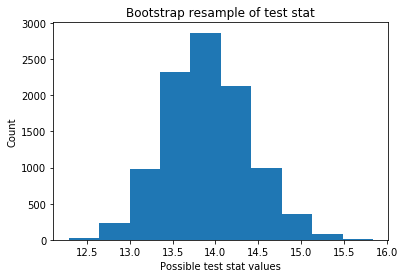

In [257]:
# duration of rides
bootstrap_sample(dev_df.duration_min, repetitions=10000);

Test stat = 37.606347644236685


Confidence interval is between 37.4238 and 37.7926025


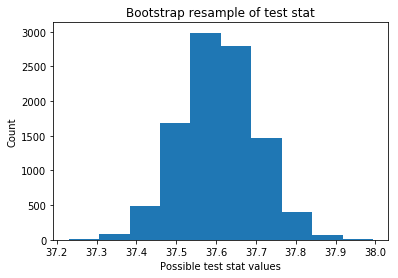

In [258]:
# mean age
bootstrap_sample(dev_df.age);

Test stat = 0.8569319719522697


Confidence interval is between 0.6771975 and 1.0527075


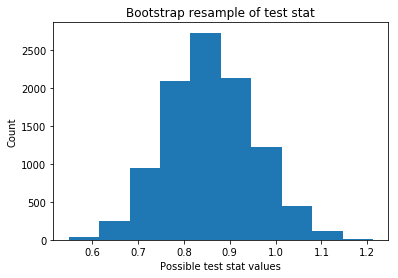

In [259]:
bootstrap_sample(dev_df.cost_to_ride);

In [107]:
# not plotting all the points come back to this one

mapping_sf = folium.Map(location=[37.77, -122.41], zoom_start=13)

for lat, lon, value in zip(dev_df['start_station_latitude'][:100], dev_df['start_station_longitude'][:100], dev_df['total_value_of_station'][:100]):
    folium.CircleMarker(
        [lat, lon],
        radius=value/5,
        color='b',
        threshold_scale=[0,1,2,3],
        fill=True,
        fill_opacity=0.2
        ).add_to(mapping_sf)
mapping_sf